In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 

#Load haberman.csv into a pandas dataFrame.
haberman_df = pd.read_csv("haberman.csv")
#Number of data points and dimensions we have
print(haberman_df.shape)
print(haberman_df.size)

#List of columns we have in given data set
print(haberman_df.columns)
#Memory usage
print(haberman_df.memory_usage())

(306, 4)
1224
Index(['age', 'year', 'nodes', 'status'], dtype='object')
Index      128
age       2448
year      2448
nodes     2448
status    2448
dtype: int64


In [3]:
#information about a DataFrame including the index dtype and columns, non-null values and memory usage.
print(haberman_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


**Observation(s):**
1. As we have 306 not-null values for all columns and is equal to rows RangeIndex, we **do not have any missing value**.

In [4]:
haberman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
#let's change year value to 1900s
haberman_df['year']=haberman_df['year']+1900


In [6]:
haberman_df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


In [7]:
#Renaming the columns for better readability
haberman_df = haberman_df.rename(columns={"age":"age_at_operation_time","year":"year_of_operation","nodes":"positive_axillary_nodes","status":"survived_longer_than_5_years"})

#Changing columns value for survived_longer_than_5_years as 1 and 2 can be confusing
haberman_df['survived_longer_than_5_years'] = haberman_df['survived_longer_than_5_years'].map({1:"yes", 2:"no"})
print(haberman_df.info())

#Here datatype of survived_longer_than_5_years is changed to object and memory usage has been increased to 9.7+ KB
print(haberman_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age_at_operation_time         306 non-null    int64 
 1   year_of_operation             306 non-null    int64 
 2   positive_axillary_nodes       306 non-null    int64 
 3   survived_longer_than_5_years  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB
None
   age_at_operation_time  year_of_operation  positive_axillary_nodes  \
0                     30               1964                        1   
1                     30               1962                        3   
2                     30               1965                        0   
3                     31               1959                        2   
4                     31               1965                        4   

  survived_longer_than_5_years  
0                          

In [8]:
#Changing datatype of survived_longer_than_5_years column to category as column will have 2 values only
haberman_df['survived_longer_than_5_years'] = haberman_df['survived_longer_than_5_years'].astype('category')

In [9]:
#Datatype change has given significant change in memory usage
print(haberman_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age_at_operation_time         306 non-null    int64   
 1   year_of_operation             306 non-null    int64   
 2   positive_axillary_nodes       306 non-null    int64   
 3   survived_longer_than_5_years  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None


In [10]:
print(haberman_df.memory_usage())

Index                            128
age_at_operation_time           2448
year_of_operation               2448
positive_axillary_nodes         2448
survived_longer_than_5_years     430
dtype: int64


**Observation(s):**
1. Category data type occupies lesser space compare to int and string, here in our case **80% less memory** is used after data type change.<br>
    &emsp;However, we need to be extra careful with categorical data when adding new value.


In [11]:
haberman_df.head()

,age_at_operation_time,year_of_operation,positive_axillary_nodes,survived_longer_than_5_years
0,30,1964,1,yes
1,30,1962,3,yes
2,30,1965,0,yes
3,31,1959,2,yes
4,31,1965,4,yes


yes    225
no      81
Name: survived_longer_than_5_years, dtype: int64


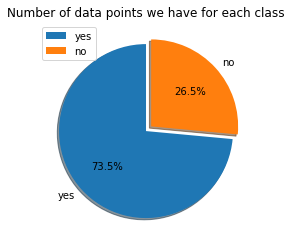

In [12]:
#(Q) How many data points we have for each class/category? 
print(haberman_df["survived_longer_than_5_years"].value_counts())

plt.pie(haberman_df["survived_longer_than_5_years"].value_counts(),labels=haberman_df['survived_longer_than_5_years'].unique(),
autopct='%1.1f%%', shadow=True, startangle=90,explode = [0,0.08])
plt.legend(labels=haberman_df['survived_longer_than_5_years'].unique(), loc="best")
plt. title('Number of data points we have for each class')
plt.show()

**Observation(s):**
1. Given data set **is not balanced**, we can clearly see this from the pie chart as well

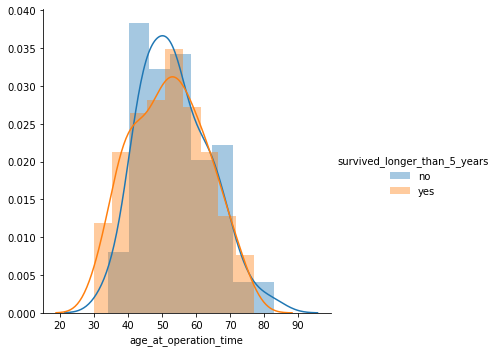

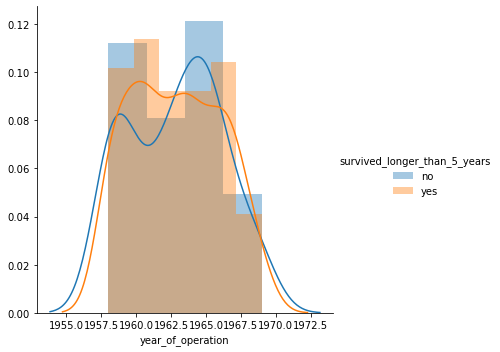

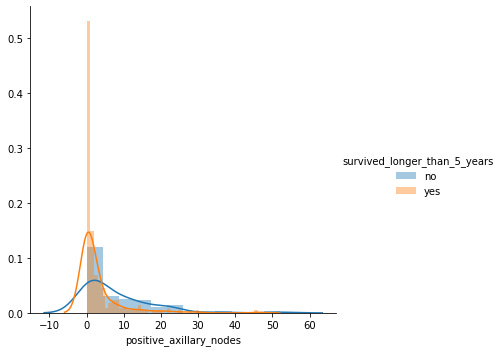

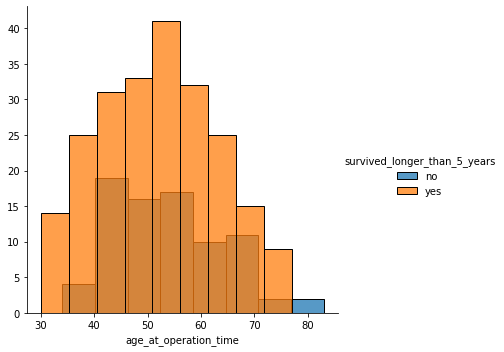

In [13]:
sns.FacetGrid(haberman_df, hue="survived_longer_than_5_years", height=5) \
   .map(sns.distplot, "age_at_operation_time") \
   .add_legend();
plt.show();
sns.FacetGrid(haberman_df, hue="survived_longer_than_5_years", height=5) \
   .map(sns.distplot, "year_of_operation") \
   .add_legend();
plt.show();
sns.FacetGrid(haberman_df, hue="survived_longer_than_5_years", height=5) \
   .map(sns.distplot, "positive_axillary_nodes") \
   .add_legend();
plt.show();

# AS`distplot` is a deprecated function and will be removed in a future version, we should use histplot here
sns.FacetGrid(haberman_df, hue="survived_longer_than_5_years", height=5) \
    .map(sns.histplot, "age_at_operation_time").add_legend();
plt.show();


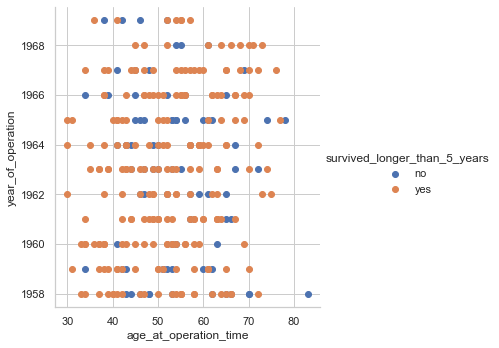

In [118]:
# 2-D Scatter plot with color-coding for each class/category.

sns.set_style("whitegrid");
sns.FacetGrid(haberman_df, hue="survived_longer_than_5_years", height=5) \
   .map(plt.scatter, "age_at_operation_time", "year_of_operation") \
   .add_legend();
plt.show();

**Observation(s):**
1. age_at_operation_time and year_of_operation, 2D scatter plot with given data points does not make much sense<br>

&emsp;&emsp;*To analyse 2D scatter plots for all possible combination of given features, we can use pair-plot.*

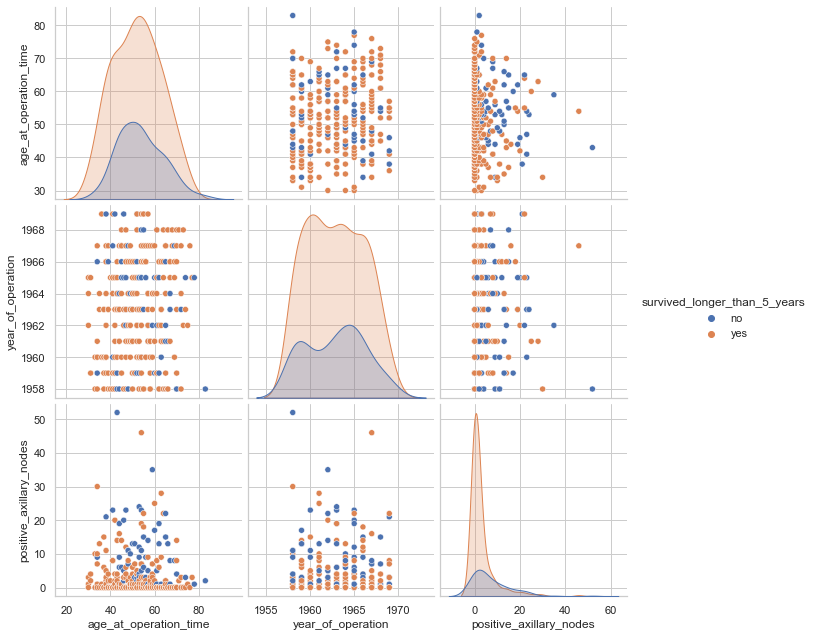

In [120]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman_df, hue="survived_longer_than_5_years", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observation(s):**
1. Data points are **not clearly seperable** for any pair.
2. For positive_axillary_node we have skewed Gaussian Distribution for datapoints of both classes.<br> 
    Here, skewness of class 'no' is more than that of class 'yes'.<br>
    We can consider this feature for further analysis.

In [14]:
haberman_yes_df = haberman_df.loc[haberman_df['survived_longer_than_5_years'] == 'yes']
haberman_no_df = haberman_df.loc[haberman_df['survived_longer_than_5_years'] == 'no']

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


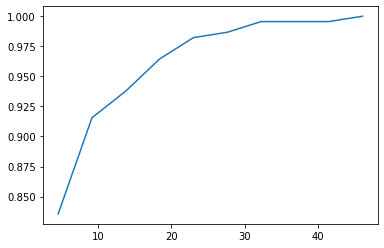

In [16]:
#yes
counts, bin_edges = np.histogram(haberman_yes_df['positive_axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


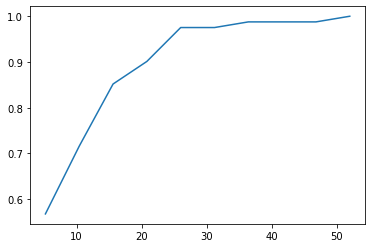

In [17]:
# no
counts, bin_edges = np.histogram(haberman_no_df['positive_axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

**Observation(s):**
1. From these CDFs, we can say that **80-85%** people have chances of surviving more that 5 years if positive_axillary_nodes value is less than 3.
2. and **55-60%** people have chances of surviving less than 5 years if positive_axillary_nodes value is less than 5.

In [18]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_no_df["age_at_operation_time"]))
print(np.mean(haberman_yes_df["age_at_operation_time"]))


print("\nStd-dev:");
print(np.std(haberman_yes_df["age_at_operation_time"]))
print(np.std(haberman_no_df["age_at_operation_time"]))

Means:
53.67901234567901
52.01777777777778

Std-dev:
10.98765547510051
10.10418219303131


**Observation(s):**
1. For feature age_at_operation_time, we do not have much difference for both the classes

In [19]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_yes_df["positive_axillary_nodes"]))
print(np.mean(haberman_no_df["positive_axillary_nodes"]))

print("\nStd-dev:");
print(np.std(haberman_yes_df["positive_axillary_nodes"]))
print(np.std(haberman_no_df["positive_axillary_nodes"]))

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_yes_df["positive_axillary_nodes"]))
print(np.median(haberman_no_df["positive_axillary_nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_yes_df["positive_axillary_nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_no_df["positive_axillary_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_yes_df["positive_axillary_nodes"],90))
print(np.percentile(haberman_no_df["positive_axillary_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_yes_df["positive_axillary_nodes"]))
print(robust.mad(haberman_no_df["positive_axillary_nodes"]))

Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


**Observation(s):**
1. Out of all 3 features, for positive_axillary_nodes, we can see quantifiable difference between both the classes
2. Seeing Median values it is clear that average positive_axillary_nodes value is 0 for patients who survived longer than 5 years and 4 for patients who did not survive longer than 5 years.

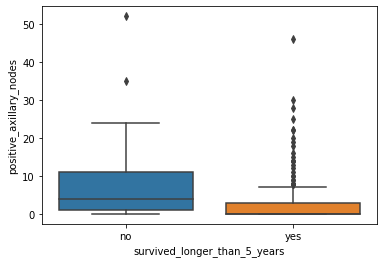

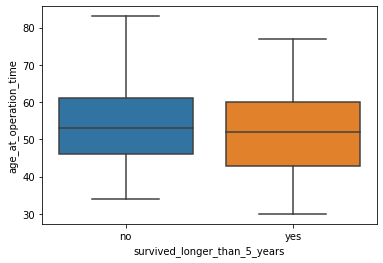

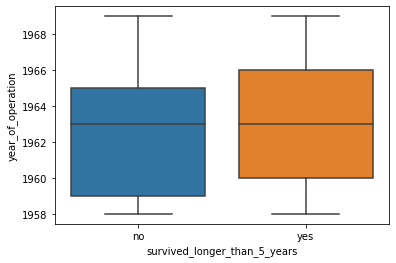

In [20]:
sns.boxplot(x='survived_longer_than_5_years',y='positive_axillary_nodes', data=haberman_df)
plt.show()
sns.boxplot(x='survived_longer_than_5_years',y='age_at_operation_time', data=haberman_df)
plt.show()
sns.boxplot(x='survived_longer_than_5_years',y='year_of_operation', data=haberman_df)
plt.show()

**Observation(s):**
1. Here also, out of all 3 features, for positive_axillary_nodes, we can see quantifiable difference between both the classes
2. For age_at_operation_time and year_of_operation, 50th percentile value is almost similar value is 0 for patients who survived longer than 5 years and 4 for patients who did not survive longer than 5 years.

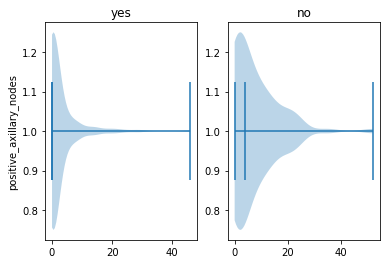

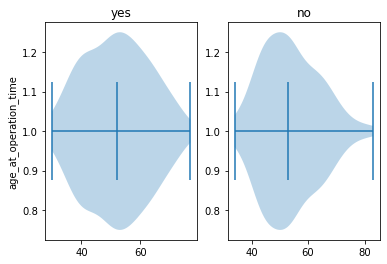

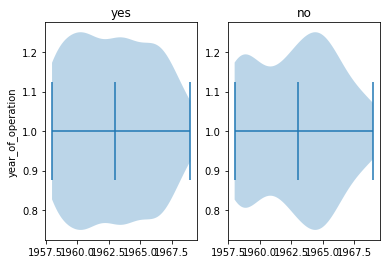

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Plot violin plot on axes 1
ax1.violinplot(haberman_yes_df.positive_axillary_nodes,showmedians=True,vert=False)
ax1.set_title('yes')
ax1.set_ylabel('positive_axillary_nodes')
ax2.violinplot(haberman_no_df.positive_axillary_nodes,showmedians=True,vert=False)
ax2.set_title('no')
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.violinplot(haberman_yes_df.age_at_operation_time,showmedians=True,vert=False)
ax1.set_title('yes')
ax1.set_ylabel('age_at_operation_time')

ax2.violinplot(haberman_no_df.age_at_operation_time,showmedians=True,vert=False)
ax2.set_title('no')

plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.violinplot(haberman_yes_df.year_of_operation,showmedians=True,vert=False)
ax1.set_title('yes')
ax1.set_ylabel('year_of_operation')

ax2.violinplot(haberman_no_df.year_of_operation,showmedians=True,vert=False)
ax2.set_title('no')

plt.show()

**Observation(s):**
1. Here also we can clearly say that out of all 3 features, for positive_axillary_nodes, we can see prominant difference between 2nd quantile value for both the classes

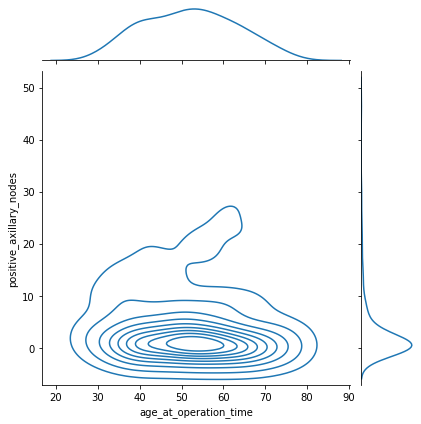

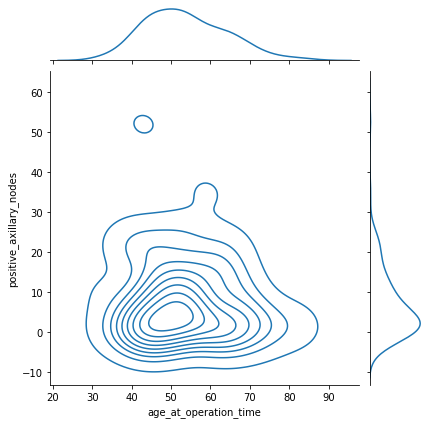

In [22]:
sns.jointplot(x="age_at_operation_time", y="positive_axillary_nodes", data=haberman_yes_df, kind="kde");
plt.show()

sns.jointplot(x="age_at_operation_time", y="positive_axillary_nodes", data=haberman_no_df, kind="kde");
plt.show()

**Observation(s):**
1. Using contour plot for age_at_operation_time and positive_axillary_nodes, we can differentiate highly probable points for 'yes' and 'no' class.<br>
    &emsp;*Though they have some overlap but we can see the difference as well.*

**Conclusion:**<br>
    1. Given data set does **not have missing values**<br>
    2. Given data set is **imbalanced**, we might be able to analyse better after balancing the dataset<br>
    3. We can use Category datatype for status(survived_longer_than_5_years) column.<br>
        &emsp;Category data type occupies lesser space compare to int and string, here in our case **80% less memory** is used for that particular feature after data type is changed.<br>
        &emsp;However, we need to be extra careful with categorical data when adding new value. <br>
    4. Data points are **not clearly seperable in pair plots** as many points for both the classes are overlapping for all pairs<br>
    5. With feature positive_axillary_node we have skewed Gaussian Distribution for datapoints of both classes. Here skewness of class 'no' is more than that of class 'yes'.<br>
    6. Out of all 3 features, for positive_axillary_nodes, we can see quantifiable difference between both the classes<br>
    7. **80-85%** people have chances of surviving more that 5 years if positive_axillary_nodes value is less than 3 and 
       &emsp;**55-60%** people have chances of surviving less than 5 years if positive_axillary_nodes value is less than 5.<br>

**Suggestion for next step:**<br>
    &emsp;Using given data we can differentiate patient's chances of survival for more than 5 years, to some extent.<br>
    &emsp;In addition to this, We should use suitable method and try to balance the dataset and then EDA can be performed on balanced data set.